-------------------------
- Author: Farzad Roozitalab
- Github: [Farzad-R](https://github.com/Farzad-R)
-------------------------

In [1]:
from SalpSwarmAlgorithm import SalpSwarmAlgorithm
from typing import List, Tuple
import numpy as np
import pandas as pd

Objective function coefficients: 1.0 , 7.0 , 11.600000000000001 , 6.999999999999999
Number of parameters: 3
Best obtained objective: [0.20559682]
Best obtained solution: [0.94740754 2.99763533 1.28829334]


<AxesSubplot:>

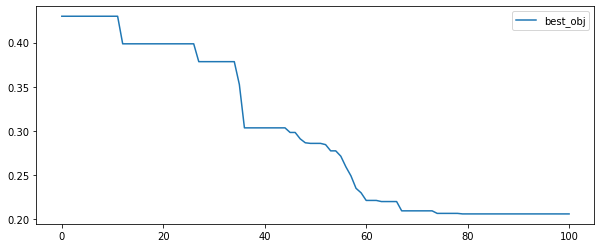

In [5]:
# Parameters of DC motor
Ra = 3  # ohm      (armature resistance)
La = 0.5  # H        (armature inductance)
k1 = 1
k2 = 0.7  # Nm/A     Torque constant
k3 = 0.8  # V.s/rad  back EMF
Jeq = 0.2  # kg.m^2   Rotor inertia
beq = 0.2  # Nm.s/rad Viscous-friction coeffecient)

# PID Control + CE
c1 = (La * Jeq) / (La * Jeq)
c2 = (La * beq + Ra * Jeq) / (La * Jeq)

c3 = (Ra * beq + k2 * k3) / (La * Jeq)
c4 = (k1 * k2) / (La * Jeq)

def exp_objective(k_list:List) -> Tuple[float, float]:
    """The PID controller needs three values: Kp, Ki, Kd"""
    Eq_coeff = [
        c1,
        c2,
        (c4 * k_list[0] + c3),
        (c4 * k_list[1]),
        (c4 * k_list[2]),
    ]  # assigning the equation parameters
    Rts = np.roots(Eq_coeff)  # Calculating the roots of the equation
    obj = np.max(
        np.real(Rts)
    )  # getting the max value from the real part of the complex roots
    fObj = np.exp(obj)
    return fObj


x_min = np.array([0.001, 0.001, 0.001])
x_max = np.array([3,3,3])

print("Objective function coefficients:", c1, ",", c2, ",", c3, ",", c4)
print("Number of parameters:", len(x_min))

EP_test = SalpSwarmAlgorithm(
    objective_function=exp_objective,
    upperbound=x_max,
    lowerbound=x_min,
    swarm_size=50,
    iterations=100,
    )
df_pop_history, df_obj_history = EP_test.run_SSA()
print("Best obtained objective:", df_obj_history.iloc[-1].values)
print("Best obtained solution:", df_pop_history.iloc[-1].values)
df_obj_history[["best_obj"]].plot(figsize=[10,4])